# Telco Customer Churn Prediction using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
#pd.to_numeric(df.TotalCharges)

In [7]:
pd.to_numeric(df.TotalCharges, errors = 'coerce') # will ignore the error cases and put NA there 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
print(df.shape)
df1 = df[df.TotalCharges!=' '].copy()
df1.shape

(7043, 20)


(7032, 20)

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


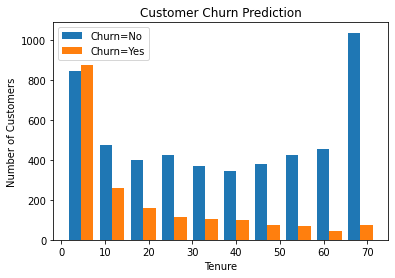

In [12]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_no,tenure_churn_yes],label=['Churn=No','Churn=Yes'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.legend()

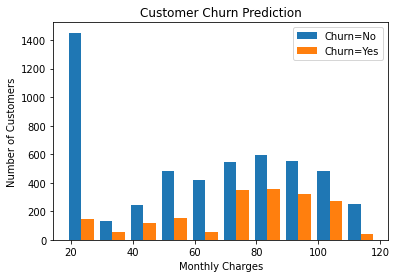

In [13]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_no,mc_churn_yes],label=['Churn=No','Churn=Yes'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.legend()

In [14]:
def print_unique_values(df):
  for x in df.columns:
    if df[x].dtype == 'object':
      print(f'{x} : {np.unique(df[x])}')

In [15]:
print_unique_values(df1)

gender : ['Female' 'Male']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'No phone service' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'No internet service' 'Yes']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtection : ['No' 'No internet service' 'Yes']
TechSupport : ['No' 'No internet service' 'Yes']
StreamingTV : ['No' 'No internet service' 'Yes']
StreamingMovies : ['No' 'No internet service' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['No' 'Yes']
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
Churn : ['No' 'Yes']


In [16]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [17]:
print_unique_values(df1)

gender : ['Female' 'Male']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['No' 'Yes']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['No' 'Yes']
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
Churn : ['No' 'Yes']


In [18]:
yes_no_columns = [x for x in df1.columns if len(np.unique(df1[x]))==2 and np.unique(df1[x])[0] == 'No']
yes_no_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [19]:
for col in yes_no_columns:
  df1[col].replace({'Yes':1, 'No':0}, inplace = True)

In [20]:
for col in df1:
  print(f"{col} : {df1[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [21]:
df1['gender'].replace({'Female':0,'Male':1}, inplace=True)

In [22]:
df2 = pd.get_dummies(data=df1,columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
393,0,0,0,0,0.253521,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
331,0,0,0,0,0.098592,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
540,0,0,1,1,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [26]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=5)

In [28]:
x_train.shape, x_test.shape

((5625, 26), (1407, 26))

In [29]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(13,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 4s 3ms/step - loss: 0.5451 - accuracy: 0.7349
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.7956
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.7982
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4099 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4087 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4078 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4062 - accura

In [30]:
y_predicted = model.predict(x_test)
y_predicted[:5]

array([[0.19210565],
       [0.61711246],
       [0.0014765 ],
       [0.82177806],
       [0.41377726]], dtype=float32)

In [31]:
for i in range(len(y_predicted)):
  if y_predicted[i] < 0.5:
    y_predicted[i] = 0
  else:
    y_predicted[i] = 1
y_predicted[:5]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

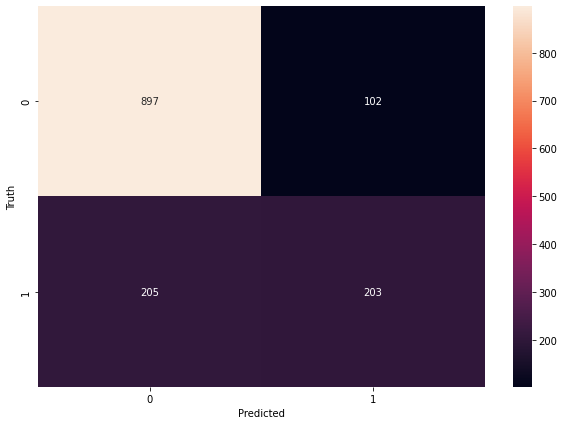

In [33]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
  model = keras.Sequential([
      keras.layers.Dense(26, input_dim=26, activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer = 'adam', loss=loss, metrics=['accuracy'])

  if weights == -1:
    model.fit(x_train,y_train,epochs=100)
  else:
    model.fit(x_train,y_train,epochs=100,class_weight=weights)

  print(model.evaluate(x_test,y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test,y_preds))

  return y_preds

In [36]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5133 - accuracy: 0.7417
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.7954
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8021
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8082
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4052 - accura

f1 score for class 1 (customer leaving the subscription) = 0.57 which is too low

In [42]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Our dataset is imbalanced

## Method 1: Random Under-sampling of the majority class

In [43]:
count_class_0, count_class_1 = df2.Churn.value_counts()
count_class_0, count_class_1

(5163, 1869)

In [44]:
df_class_0 = df2[df2.Churn == 0]
df_class_1 = df2[df2.Churn == 1]
df_class_0.shape

(5163, 27)

In [45]:
df_class_1.shape

(1869, 27)

In [47]:
df_class_0_under = df_class_0.sample(count_class_1)

In [48]:
df_class_0_under.shape

(1869, 27)

In [49]:
df_under = pd.concat([df_class_0_under,df_class_1], axis=0)
df_under.shape

(3738, 27)

In [51]:
print('Random under-sampling: ')
print(df_under.Churn.value_counts())

Random under-sampling: 
0    1869
1    1869
Name: Churn, dtype: int64


In [55]:
x = df_under.drop('Churn',axis='columns')
y = df_under['Churn']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y)

stratify = y = df_under.Churn will split data in such a way that both training and testing data will have equal proportions of classes

In [56]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [57]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5985 - accuracy: 0.7040
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5171 - accuracy: 0.7562
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7656
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7766
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7776
Epoch 11/

Previous Classification report

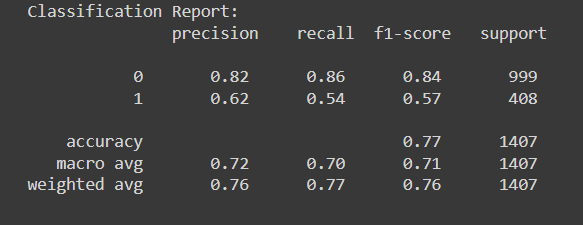

The precision, recall and f1 score has improved for the minority class and decreased for majority class but this seems to be fair treatment to both classes as they have similar scores.

## Method 2: Over-sampling the minority class

In [58]:
count_class_0, count_class_1

(5163, 1869)

In [59]:
df_class_1.sample(2000)

ValueError: ignored

Since there aren't enough samples we will get error. So we need to give an additional argument replace=True

In [60]:
df_class_1.sample(2000, replace=True).shape

(2000, 27)

In [62]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [64]:
df_class_1_over.shape

(5163, 27)

In [65]:
df_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_over.shape

(10326, 27)

In [66]:
print('Random over-sampling: ')
print(df_over.Churn.value_counts())

Random over-sampling: 
0    5163
1    5163
Name: Churn, dtype: int64


In [67]:
x = df_over.drop('Churn',axis='columns')
y = df_over['Churn']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [68]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [69]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5580 - accuracy: 0.7218
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4950 - accuracy: 0.7637
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4831 - accuracy: 0.7707
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4767 - accuracy: 0.7740
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.7746
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.7782
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.7787
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.7795
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4600 - accuracy: 0.7824
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4549 - accura

## Method 3: SMOTE (Synthetic Minority Oversampling Technique)

In [70]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [71]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x_sm, y_sm, test_size=0.2, stratify=y_sm)

In [76]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [77]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [78]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 5ms/step - loss: 0.5165 - accuracy: 0.7562
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4751 - accuracy: 0.7749
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4676 - accuracy: 0.7771
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4615 - accuracy: 0.7818
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4562 - accuracy: 0.7835
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4511 - accuracy: 0.7863
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.7912
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.7868
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.7936
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4365 - accura

## Method 4: Use of Ensemble with under-sampling

In [79]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [81]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [83]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [84]:
4130/1495

2.762541806020067

In [91]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [92]:
df3_class_0 = df3[df3.Churn==0]
df3_class_1 = df3[df3.Churn==1]

In [93]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [95]:
def get_train_batch(df_majority,df3_minority,start,end):
  
  df_train = pd.concat([df_majority[start:end],df3_minority],axis=0)
  
  x_train = df_train.drop('Churn', axis='columns')
  y_train = df_train.Churn

  return x_train, y_train

In [101]:
x_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)
pred1 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6420 - accuracy: 0.6435
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7726
Epoch 11/

In [102]:
x_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)
pred2 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6432 - accuracy: 0.6482
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7498
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7622
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7676
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7742
Epoch 11/

In [103]:
x_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)
pred3 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6235 - accuracy: 0.6782
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7658
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7685
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7731
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7810
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7761
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.7818
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7803
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7852
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7795
Epoch 11/

if we have two or more 1's out of three then the final prediction value will be 1 so the basic logic is that sum should be greater than 1

for ex:

pred1[i] = 0

pred2[i] = 1

pred3[i] = 1

num of ones or sum of all three preds = 0 + 1 + 1 = 2 > 1


therefore majority vote is 1

pred1[i] = 0

pred2[i] = 1

pred3[i] = 0

num of ones or sum of all three preds = 0 + 1 + 0 = 1 > 1 (false)

therefore majority vote is 0

In [104]:
y_pred_final = pred1.copy()

for i in range(len(pred1)):
  num_ones = pred1[i]+pred2[i]+pred3[i]
  if num_ones>1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [106]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.48      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



# Conclusion:

##Classification reports

###1. Without Sampling

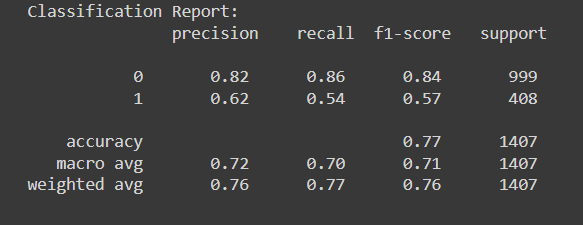

### 2. Random Under-sampling of the majority class

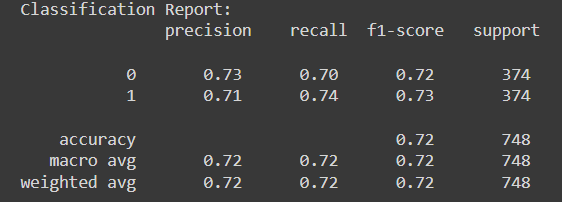


### 3. Over-sampling the minority class

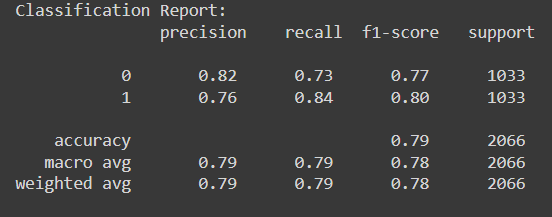

### 4. SMOTE (Synthetic Minority Oversampling Technique)

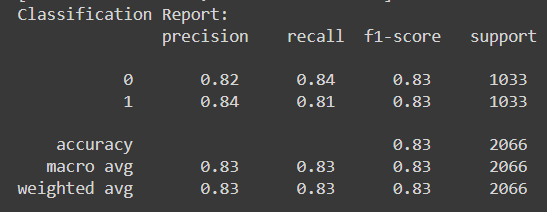

### 5. Use of Ensemble with under-sampling

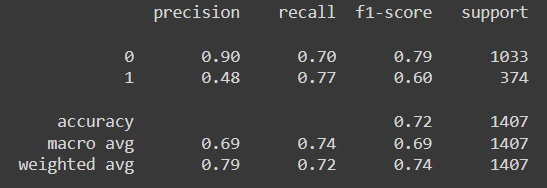